In [1]:
import pandas as pd
from gemelli.rpca import rpca, joint_rpca, feature_correlation_table
from biom import Table, load_table
import numpy as np
import glob
from skbio import OrdinationResults
from biom import load_table

import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import tables

In [2]:
ord_joint = OrdinationResults.read('../../results/joint-rpca/ord.txt')
ord_joint_feats = ord_joint.features.copy()
axis_use = 1 # use PC2
# import tables data 
metadata_subset = pd.read_csv('../../network/split-matched-data/metadata.tsv', sep='\t', index_col=0)
tables = {}
for table_ in glob.glob('../../network/split-matched-data/*.biom'):
    if '16S' in table_:
        continue
    if 'gene.biom' in table_:
        continue
    bt_tmp = load_table(table_)
    bt_tmp_df = pd.DataFrame(bt_tmp.matrix_data.toarray(), bt_tmp.ids('observation'), bt_tmp.ids())
    bt_tmp_df = bt_tmp_df[metadata_subset.index]
    ord_joint_feats_tmp = ord_joint_feats.loc[set(ord_joint_feats.index) & set(bt_tmp.ids('observation')), :]
    ord_joint_feats_tmp = ord_joint_feats_tmp.sort_values(by=axis_use)
    tables[table_.split('/')[-1].split('.')[0]] = [bt_tmp, bt_tmp_df, ord_joint_feats_tmp]
    
tables.keys()
    

dict_keys(['metabolite', 'mag', '18S', 'gene_module'])

In [3]:
# annots for tables
taxonomy_18s = pd.read_csv('../../network/annotations/18S_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_18s = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_18s.index, taxonomy_18s.Taxon.values)}
taxonomy_18s = pd.DataFrame(taxonomy_18s).T
taxonomy_18s_nosp = taxonomy_18s.drop([' s'], axis=1)

taxonomy_mag = pd.read_csv('../../network/annotations/MAG_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_mag = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_mag.index, taxonomy_mag.Taxon.values)}
taxonomy_mag = pd.DataFrame(taxonomy_mag).T
taxonomy_mag[taxonomy_mag == ''] = np.nan

metab_ids = pd.read_excel('../../network/metabolite_formulas.xlsx', index_col=0)
metab_ids.index = ['metab_' + str(x) for x in metab_ids.index]
metab_ids_class = metab_ids.dropna(subset=['most specific class'])


In [4]:
bt_tmp, df_tmp, ord_tmp = tables['metabolite']
keep_metab = set(metab_ids_class.index) & set(bt_tmp.ids('observation'))
bt_tmp = bt_tmp.filter(keep_metab, axis='observation')
df_tmp = df_tmp.loc[keep_metab, :]
ord_tmp = ord_tmp.loc[keep_metab, :].sort_values(by=axis_use)
tables['metabolite'] = [bt_tmp, df_tmp, ord_tmp]


In [5]:
feature_feature_correlation = feature_correlation_table(ord_joint)
feature_feature_correlation.head(5)

,metab_1,metab_2,metab_3,metab_4,metab_5,metab_6,metab_9,metab_10,metab_11,metab_12,...,sp|Q4Z9G3|PORTL_BPTWO_Probable_portal_protein;_XpXrXs,sp|Q52118|YMO3_PANSE_Uncharacterized_protein_in_mobD_3'region;_Xh,sp|Q5PLI4|DGCQ_SALPA_Probable_diguanylate_cyclase_DgcQ;_Xh,sp|Q5UQ90|YL532_MIMIV_Cytochrome_P450-like_protein_L532;_XhXs,sp|Q5UQG2|YL498_MIMIV_Probable_zinc-type_alcohol_dehydrogenase-like_protein_L498;_XhXs,sp|Q5UQI9|YR836_MIMIV_Uncharacterized_protein_R836;_Xu,sp|Q7VIN2|NPD_HELHP_NAD-dependent_protein_deacylase;_Xh,sp|Q8ZNY9|PRP1_SALTY_Serine/threonine-protein_phosphatase_1;_Xh,sp|Q93J06|LIP2_STRCO_Lipase_2;_Xh,sp|Q9USU3|FBH1_SCHPO_F-box_DNA_helicase_protein_1;_Xh
metab_1,2.029508,2.593932,0.150068,1.050517,0.302961,0.482651,1.029429,-0.083813,-1.099086,-0.355401,...,-3.358331,0.478436,1.647467,-0.025742,1.229848,-0.334765,2.678652,0.622921,2.184642,-1.571718
metab_2,2.593932,3.671283,-0.350406,1.276746,0.118799,1.884196,1.269426,0.004174,-0.635991,-0.515986,...,-4.336223,-0.266280,1.035941,-0.790268,0.376459,0.276383,2.312644,1.093721,2.184846,-2.291901
metab_3,0.150068,-0.350406,1.080239,0.153180,0.390056,-2.751437,0.283627,-0.214938,-1.507810,0.401581,...,-0.160363,0.466284,1.850085,0.885986,1.106660,-0.543681,1.976897,0.159740,0.193547,0.716806
metab_4,1.050517,1.276746,0.153180,0.560746,0.212119,0.109406,0.532754,-0.057345,-0.701822,-0.213999,...,-1.710281,0.495466,1.100633,0.179247,0.963368,-0.426955,1.650711,0.195262,1.359610,-0.783505
metab_5,0.302961,0.118799,0.390056,0.212119,0.255456,-0.734432,0.168671,-0.088173,-0.710760,-0.067528,...,-0.458190,0.882190,1.072670,0.627730,1.235535,-0.715795,1.264364,-0.236057,0.950712,-0.077685


# analysis


In [10]:
# make each log-ratio based on axis
quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
for modality, (_, table_, ranks_) in tables.items():
    for i_ in range(1, 1500):
        num = ranks_.iloc[:i_, :].index
        den = ranks_.iloc[-i_:, :].index
        features_used_all[modality] = [num[:19], den[:19]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality)
    print(i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')
    
#metadata_logratios


/Users/zacharyburcham/miniforge3/envs/rpca/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


metabolite
238
1.0
mag
30
0.9919786096256684
18S
1499
0.9010695187165776
gene_module
26
1.0


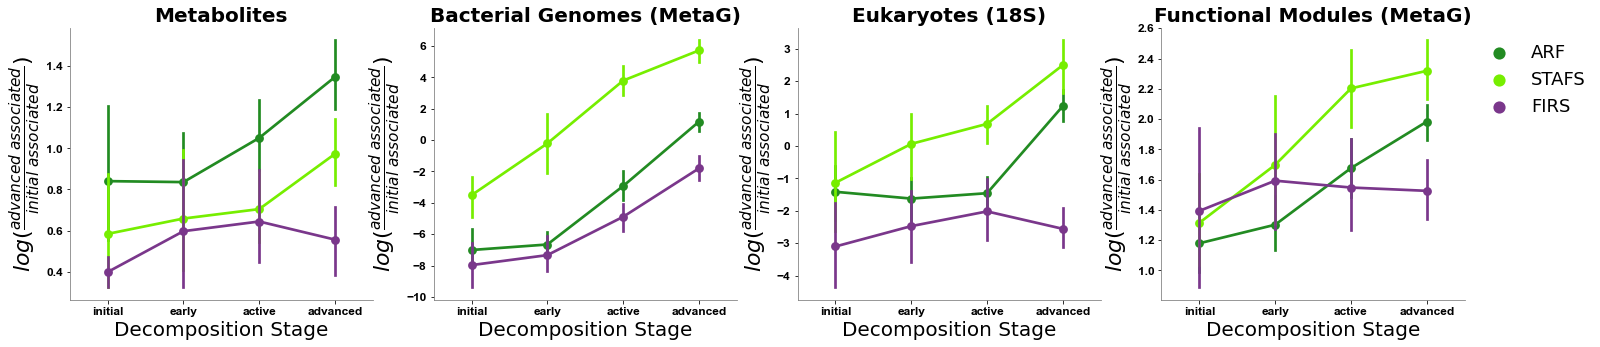

In [15]:
fig, axn = plt.subplots(1, 4, figsize=(5*5, 5))

titles_ =  {'mag_logratio':'Bacterial Genomes (MetaG)',
 '18S_logratio':'Eukaryotes (18S)',
 'gene_module_logratio':'Functional Modules (MetaG)',
 'metabolite_logratio':'Metabolites'}

palette=["#228b22","#76ee00","#7a378b"]

for ax, lr_ in zip(axn, lr_cols):


    sns.pointplot(x='add_0c_group', y=lr_, hue='facility', hue_order = ['ARF', 'STAFS', 'FIRS'], palette=palette,
                  order = ['initial', 'early', 'active', 'advanced'],
                  data=metadata_logratios, ax=ax)

    ax.set_xlabel('Decomposition Stage',
                  color='black',
                  fontsize=20)
    ax.set_ylabel('$log(\\frac{advanced\,\,associated}{initial\,\,associated})$',
                  color='black',
                  weight='bold',
                  fontsize=22)

    ax.set_title(titles_[lr_],
                  color='black',
                  weight='bold',
                  fontsize=20)

    # fix backround
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')

    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    ax.legend_.remove()

legend = ax.legend(loc=2, 
           bbox_to_anchor=(1, 1),
           prop={'size':18},
           title="",
           fancybox=True,
                    framealpha=.0,
           ncol=1, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

plt.savefig('../../results/figures/rpca-log-ratios.png',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')
plt.show()


In [16]:
# make sure no overlap
{k_:set(v1) & set(v2) for k_, (v1, v2) in features_used_all.items()}


{'metabolite': set(), 'mag': set(), '18S': set(), 'gene_module': set()}

In [17]:
metadata_logratios.to_csv('../../results/joint-rpca/metadata_w_log_ratios.csv')

# advanced associated

In [25]:
#all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
#                    for v_ in list(v1) + list(v2)]) & set(feature_feature_correlation.index)
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v2)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

(76, 76)

In [26]:

new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolite'][1].index:
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH:ubiquinone oxidoreductase mitochondria,Acinetobacter baumannii B (s),Acinetobacter rudis (s),Adhesin protein transport system,Animalia ( k),Apiotrichum ( g),Arginine/lysine/histidine/glutamine transport system,Arginine/ornithine transport system,Bacteroides E (g),Benzene and substituted derivatives,...,Tissierellales (o),Trehalose transport system,Trichosporonaceae ( fs),Type I signiture cas proteins,Tyrosine biosynthesis prephanate to pretyrosine to tyrosine,Universal Cas proteins,Vagococcus A lutrae (s),Wohlfahrtiimonadaceae (f),Wohlfahrtiimonas chitiniclastica (s),Yarrowia ( g)
axis1,,,,,,,,,,,,,,,,,,,,,
0DH:ubiquinone oxidoreductase mitochondria,41.555826,54.452319,36.561343,32.025726,20.833147,28.362736,40.050642,33.030623,33.657206,1.581823,...,29.167451,26.437127,24.772251,31.948233,22.212105,23.270939,39.603561,16.939758,42.996854,16.635860
Acinetobacter baumannii B (s),54.452319,204.596912,58.051988,50.737423,15.461956,0.423446,70.373663,17.422722,-26.443023,-25.641816,...,-56.122800,-30.139683,-26.168098,18.161669,23.723567,-5.944548,-0.849238,-115.650014,23.870585,-27.087003
Acinetobacter rudis (s),36.561343,58.051988,52.910836,39.093906,21.167690,17.274382,39.376654,38.134824,46.808205,-2.322637,...,43.389190,13.704108,23.310278,40.869363,27.881840,27.059602,60.179295,30.861051,63.445183,33.204340
Adhesin protein transport system,32.025726,50.737423,39.093906,30.552798,16.664116,16.290547,32.762259,29.214105,32.934945,-1.546646,...,29.026858,12.116205,17.899122,30.291552,21.287376,20.145209,42.217309,17.280379,45.598399,20.701445
Animalia ( k),20.833147,15.461956,21.167690,16.664116,20.492036,26.612269,30.050208,24.144023,26.433095,4.791635,...,28.039903,43.444920,24.999498,24.666480,12.728392,19.674733,28.384581,29.968517,26.808392,22.163209


In [27]:
feature_feature_correlation_subset_relabel.to_csv('../../results/joint-rpca/advanced-associated-covariance.csv')


In [31]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
# Camerons
#links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0]) \
#                         & (links['var1'] != links['var2']) ]

# Mine
#links_filtered = pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])],
#    links.loc[(links['var1'] != links['var2']) & (links.value.abs() == 1)]], axis=0)


links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
                          links.loc[ (links['var1'] == links['var2'])]], axis=0)


links_filtered.shape


(382, 3)

In [32]:

color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}



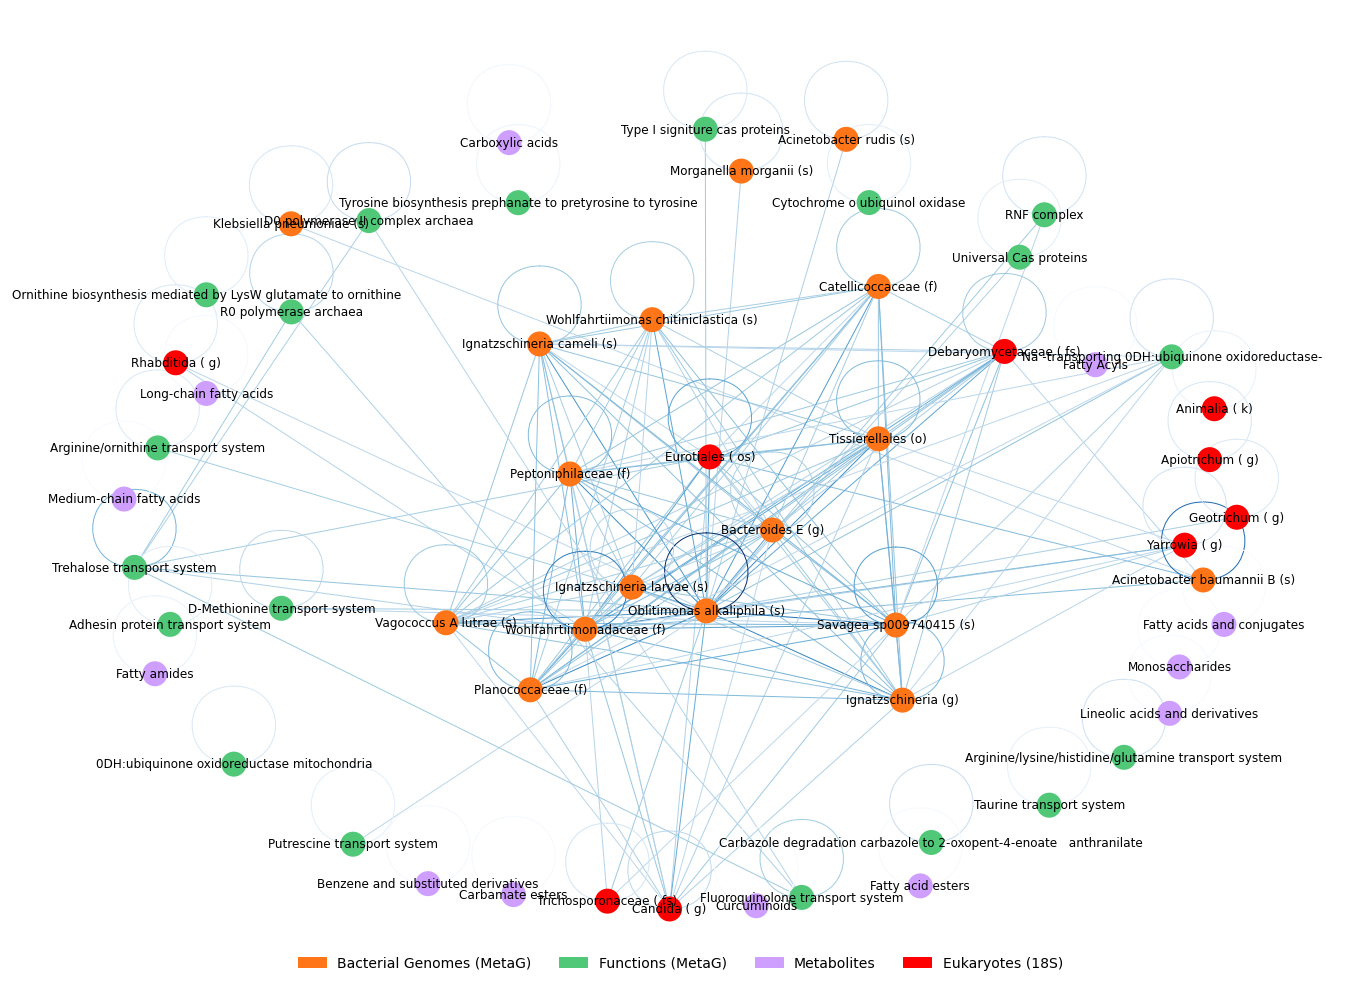

In [33]:

# Build your graph
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
values = range(links_filtered.shape[0])


#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=2)

fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

y_off = 3

nx.draw(G, with_labels=True,
        pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
        node_color=[color_map[modality_map_label[node[0]]]
                    for node in G.nodes(data=True)], 
        node_size=[assoc_map_label[node[0]]
                    for node in G.nodes(data=True)], 
        #node_size=400,
        edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                    for u, v in G.edges],
        edge_cmap= plt.cm.Blues,
        linewidths=5,
        width=1,
        font_size=12, ax=ax)


handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
           prop={'size':14},
           title="",
           fancybox=True,
                    framealpha=.0,
           ncol=4, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

plt.tight_layout()
plt.savefig('../../results/figures/advanced-network.png',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')
    
plt.show()


# start associated

In [19]:
#all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
#                    for v_ in list(v1) + list(v2)]) & set(feature_feature_correlation.index)
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v1)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

(76, 76)

In [20]:

new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolomics'][1].index:
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH dehydrogenase ubiquinone 1 alpha subcomplex,0DH dehydrogenase ubiquinone 1 beta subcomplex,70-9 (f),AI-2 transport system,Acetoin utilization transport system,Actinomycetia (c),Actinoplanes (g),Alveolata ( k),Amino acids,Araeolaimida ( g),...,R0 polymerase I eukaryotes,SKKL01 (f),Solirubrobacteraceae (f),Spumella ( g),Straight chain fatty acids,Succinate dehydrogenase ubiquinone,Triacylglycerols,Uncharacterized ABC transport system,VAZQ01 (g),thiosulfate reductase / polysulfide reductase chain A [EC:1.8.5.5]
axis1,,,,,,,,,,,,,,,,,,,,,
0DH dehydrogenase ubiquinone 1 alpha subcomplex,31.979090,22.311462,10.510076,34.109482,19.991219,29.836778,27.084527,15.363125,3.211343,19.579832,...,30.416484,40.668029,34.390536,24.326066,1.867295,34.502494,5.305464,11.858151,18.321863,32.696066
0DH dehydrogenase ubiquinone 1 beta subcomplex,22.311462,27.951974,21.160680,10.808788,40.087000,19.463523,16.692914,6.881417,2.456624,30.781476,...,4.942834,24.644848,22.805731,23.192954,4.628113,23.993181,-1.027977,38.496511,26.310990,27.223920
70-9 (f),10.510076,21.160680,85.384291,-3.134800,43.485062,88.835936,-1.271114,81.412721,0.886340,67.995112,...,0.090145,88.466261,104.918393,43.344352,5.232626,12.154393,-7.328064,69.776240,146.453456,43.158454
AI-2 transport system,34.109482,10.808788,-3.134800,75.633178,4.294794,53.565955,62.592403,26.238061,2.476788,5.065782,...,48.860445,55.002566,56.660042,34.929966,-0.251851,49.745993,12.069561,-17.522442,13.804420,47.301178
Acetoin utilization transport system,19.991219,40.087000,43.485062,4.294794,72.755830,33.304178,24.089145,13.163045,2.124301,54.132323,...,-14.651906,29.814823,37.517053,37.884331,8.792956,26.709094,-6.515424,75.521321,57.874946,39.819359


In [21]:
feature_feature_correlation_subset_relabel.to_csv('../../results/joint-rpca/start-associated-covariance.csv')


In [22]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

#links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0]) \
#                         & (links['var1'] != links['var2']) ]
links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
                          links.loc[ (links['var1'] == links['var2'])]], axis=0)


links_filtered.shape


(433, 3)

In [23]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red 
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}



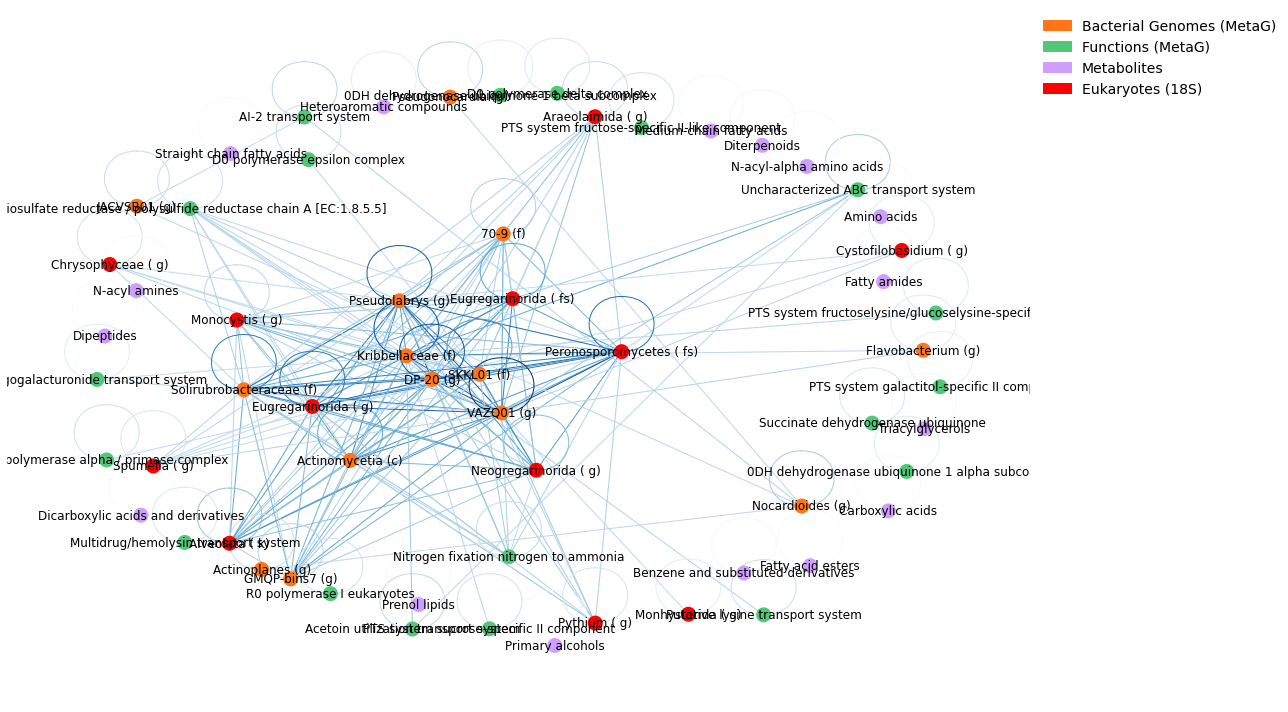

In [24]:


 # Build your graph
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
values = range(links_filtered.shape[0])


#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=1.8)

fig, ax = plt.subplots(1, 1, figsize=(18, 10)) 

y_off = 3

nx.draw(G, with_labels=True,
        pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
        node_color=[color_map[modality_map_label[node[0]]]
                    for node in G.nodes(data=True)], 
        node_size=[assoc_map_label[node[0]]
                    for node in G.nodes(data=True)], 
        #node_size=400,
        edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                    for u, v in G.edges],
        edge_cmap= plt.cm.Blues,
        linewidths=5,
        width=1,
        font_size=12, ax=ax)


handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
legend = ax.legend(handles=handles_, loc=2, 
           bbox_to_anchor=(1, 1),
           prop={'size':14},
           title="",
           fancybox=True,
                    framealpha=.0,
           ncol=1, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

plt.tight_layout()

plt.savefig('../../results/figures/start-network.png',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')
    
plt.show()